In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as stats
from statsmodels.tsa.arima.model import ARIMA
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA

In [2]:
unemp=pd.read_csv('../time_series/Local_Area_Unemployment_Statistics__Beginning_1976.csv')

In [3]:
unemp['Date']=pd.to_datetime(unemp[['Year', 'Month']].assign(DAY=1))

In [4]:
unemp.reset_index(drop=True, inplace=True)

In [5]:
unemp.head()

,Area,Year,Month,Labor Force,Employed,Unemployed,Unemployment Rate,Date
0,New York State,2022,1,9397000,8900900,496100,5.3,2022-01-01
1,New York State,2022,2,9400100,8923000,477100,5.1,2022-02-01
2,New York State,2022,3,9438700,8995400,443300,4.7,2022-03-01
3,New York State,2022,4,9397500,9006400,391000,4.2,2022-04-01
4,New York State,2022,5,9503900,9115300,388600,4.1,2022-05-01


In [6]:
nyc=unemp[unemp['Area'] == 'New York City'][['Date','Labor Force', 'Employed', 'Unemployed', 'Year', 'Month']].reset_index(drop=True)

In [7]:
new = nyc.set_index('Date')

<AxesSubplot:xlabel='Date'>

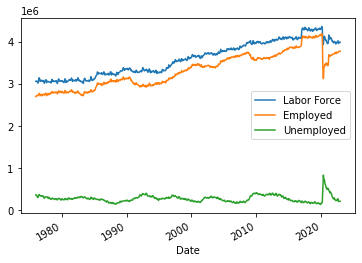

In [8]:
new[['Labor Force', 'Employed', 'Unemployed']].plot()

<AxesSubplot:title={'center':'Labor Force & Unemployed'}, xlabel='Date'>

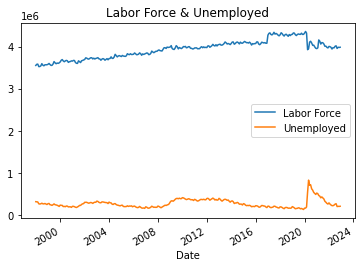

In [9]:
# I will focus on unempl figures first. Labor Force is growing but unemployement is pretty steady over the years
new[:300][['Labor Force','Unemployed']].plot(title = "Labor Force & Unemployed")

In [10]:
unemployment = new[['Unemployed']]

In [11]:
#Exploring Normality
mean=np.mean(unemployment.Unemployed.values)
std=np.std(unemployment.Unemployed.values)


In [12]:
import seaborn as sns

/home/evgeniya/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


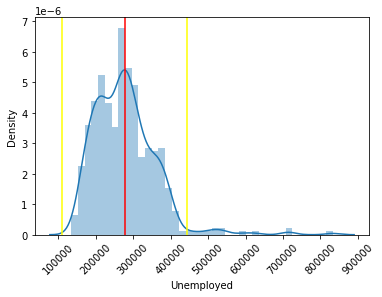

In [13]:
sns.distplot(unemployment.Unemployed)
plt.xticks(rotation=45)
plt.axvline(x=mean, color='r', linestyle='-')
plt.axvline(x=mean+2*std, color='yellow')
plt.axvline(x=mean-2*std, color='yellow')
plt.show();

In [ ]:
#Checking Stationarity

<AxesSubplot:xlabel='Date'>

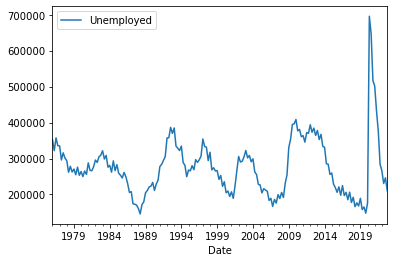

In [14]:
unemployment.resample("Q").mean().plot()

<AxesSubplot:xlabel='Date'>

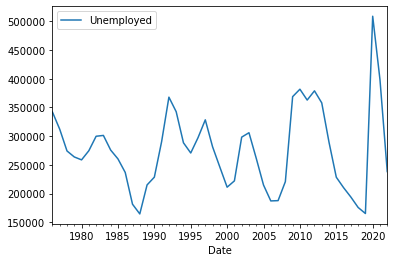

In [15]:
unemployment.resample("A").mean().plot()

In [16]:
mon = unemployment.Unemployed.resample("M").agg(sum).to_frame("Unemployed")
mon["ix"]=range(0, len(mon))

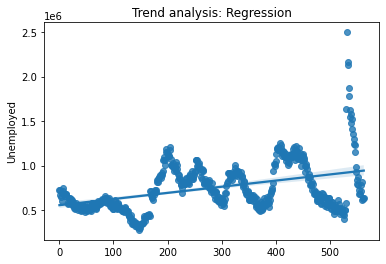

In [17]:
# This plot shows upward sloping trend
sns.regplot(data=mon, x=mon.ix, y='Unemployed')
plt.title("Trend analysis: Regression")
plt.xlabel("")
plt.show()

In [ ]:
#Manually checking for correlation between time series and it's lags

In [18]:
unemployment['lag_2'] = unemployment['Unemployed'].shift(2)
unemployment['lag_3'] = unemployment['Unemployed'].shift(3)
unemployment['lag_4'] = unemployment['Unemployed'].shift(4)
unemployment['lag_5'] = unemployment['Unemployed'].shift(5)
unemployment['lag_6'] = unemployment['Unemployed'].shift(6)
unemployment['lag_7'] = unemployment['Unemployed'].shift(7)
unemployment['lag_8'] = unemployment['Unemployed'].shift(8)
unemployment['lag_9'] = unemployment['Unemployed'].shift(9)
unemployment['lag_10'] = unemployment['Unemployed'].shift(10)
unemployment['lag_11'] = unemployment['Unemployed'].shift(11)
unemployment['lag_12'] = unemployment['Unemployed'].shift(12)


/tmp/ipykernel_125836/3906812520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment['lag_2'] = unemployment['Unemployed'].shift(2)
/tmp/ipykernel_125836/3906812520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemployment['lag_3'] = unemployment['Unemployed'].shift(3)
/tmp/ipykernel_125836/3906812520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

In [19]:
unemployment

,Unemployed,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,
2022-01-01,292200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-01,262500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-01,242500,292200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-01,227100,262500.0,292200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-05-01,225500,242500.0,262500.0,292200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1976-08-01,359900,345100.0,299100.0,321100.0,334000.0,361700.0,362800.0,279200.0,315200.0,309000.0,311000.0,317300.0
1976-09-01,340000,372500.0,345100.0,299100.0,321100.0,334000.0,361700.0,362800.0,279200.0,315200.0,309000.0,311000.0
1976-10-01,339100,359900.0,372500.0,345100.0,299100.0,321100.0,334000.0,361700.0,362800.0,279200.0,315200.0,309000.0


In [20]:
unemployment.corr()

,Unemployed,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Unemployed,1.000000,0.753067,0.638285,0.544842,0.481289,0.411191,0.343464,0.277370,0.251357,0.270361,0.310812,0.364092
lag_2,0.753067,1.000000,0.886564,0.752906,0.638013,0.544457,0.480891,0.410964,0.343240,0.276973,0.250779,0.269714
lag_3,0.638285,0.886564,1.000000,0.886522,0.752802,0.637845,0.544276,0.480860,0.410819,0.343021,0.276621,0.250408
lag_4,0.544842,0.752906,0.886522,1.000000,0.886483,0.752700,0.637699,0.544260,0.480732,0.410619,0.342698,0.276258
lag_5,0.481289,0.638013,0.752802,0.886483,1.000000,0.886405,0.752576,0.637748,0.544141,0.480515,0.410227,0.342254
lag_6,0.411191,0.544457,0.637845,0.752700,0.886405,1.000000,0.886366,0.752719,0.637684,0.543943,0.480118,0.409769
lag_7,0.343464,0.480891,0.544276,0.637699,0.752576,0.886366,1.000000,0.886439,0.752669,0.637554,0.543701,0.479837
lag_8,0.277370,0.410964,0.480860,0.544260,0.637748,0.752719,0.886439,1.000000,0.886449,0.752684,0.637610,0.543725
lag_9,0.251357,0.343240,0.410819,0.480732,0.544141,0.637684,0.752669,0.886449,1.000000,0.886429,0.752656,0.637533
lag_10,0.270361,0.276973,0.343021,0.410619,0.480515,0.543943,0.637554,0.752684,0.886429,1.000000,0.886410,0.752570


In [21]:
#sns.heatmap(unemployment.corr(), annot=True)

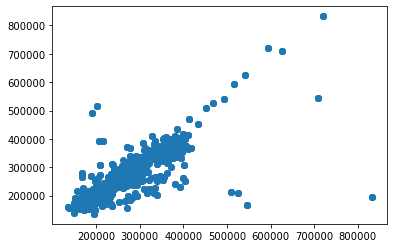

In [22]:
plt.scatter(unemployment['Unemployed'], unemployment['lag_2'])

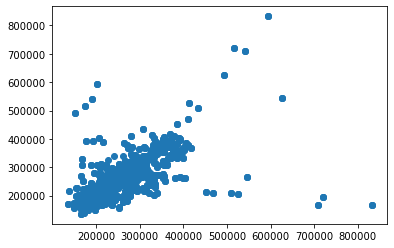

In [23]:
plt.scatter(unemployment['Unemployed'], unemployment['lag_4'])

In [24]:
#unemployment['Unemployed'].rolling(window=12).mean().plot()

In [25]:
#unemployment['Unemployed'].rolling(window=12).std().plot()

In [ ]:
# Make the time series stationary by taking diff - subtracting the previous value from each value in time series

<AxesSubplot:xlabel='Date'>

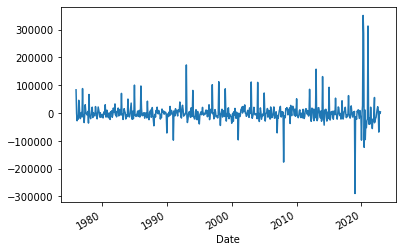

In [18]:
# Plotting the first_diff. Looks Stationary
fst_diff=unemployment['Unemployed'].diff().dropna()
fst_diff.plot()

In [20]:
#checking Stationarity using adfuller. H0 is data non-stationary

adfuller(fst_diff)
p_val = adfuller(fst_diff)[1] # the p_val is less than 0.05, therefore the data is stationary

8.548364978758293e-13

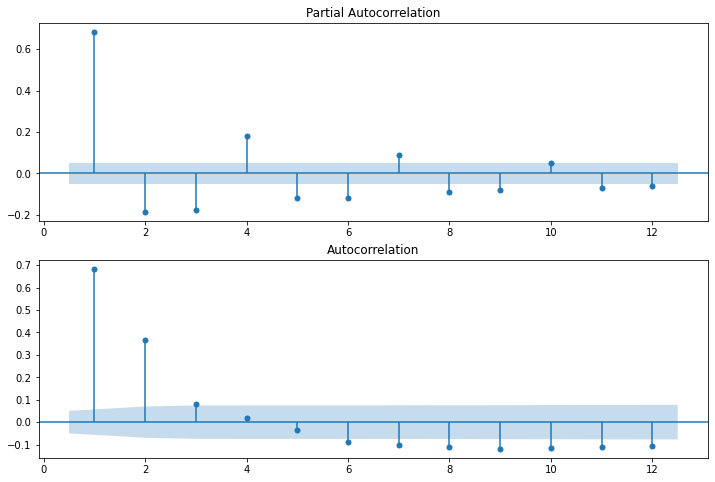

In [66]:
# Estimating: Selecting Right Model Order
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))

# acf 
sm.graphics.tsa.plot_pacf(fst_diff.sort_index(ascending=True), zero=False, lags=12, ax=ax1)
# pacf
sm.graphics.tsa.plot_acf(fst_diff.sort_index(ascending=True), zero=False,lags=12, ax=ax2)
plt.show()

In [67]:
#creating perms of orders
my_list=[]
for p in range(7):
    for q in range(2):
        my_list.append((p,1,q))        

In [68]:
#Creating perms of orders, fitting ARMA model and appending aic/bic results for selecting the best 
order_aic_bic=[]
for p in range(7):
    for q in range(2):
        model= ARIMA(unemployment['Unemployed'], order=(p, 1, q))
        results= model.fit()
        order_aic_bic.append((p,q, results.aic, results.bic))
order_df=pd.DataFrame(order_aic_bic, columns=['p', 'q', 'AIC', 'BIC'])
order_df.sort_values('AIC', ascending= False)

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

,p,q,AIC,BIC
0,0,0,36568.120524,36573.448961
2,1,0,36559.346991,36570.003866
1,0,1,36557.315667,36567.972541
3,1,1,36549.737197,36565.722509
4,2,0,36548.433469,36564.418781
6,3,0,36540.723767,36562.037516
13,6,1,36519.943195,36562.570694
8,4,0,36518.914936,36545.557122
10,5,0,36518.821219,36550.791843
12,6,0,36517.891982,36555.191044


In [98]:
splt=int(0.8*len(unemployment['Unemployed']))
train_data = unemployment['Unemployed'][:splt]
test_data = unemployment['Unemployed'][splt:]

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-st

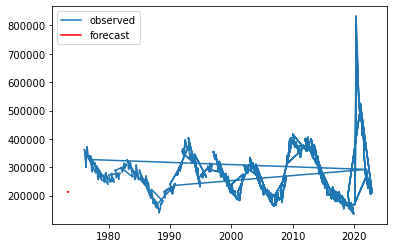

In [108]:
# The best model in is (2,1,1). Let's do one-step ahead predicions

model1=ARIMA(train_data.sort_index(ascending=True), order=(2,1,1))
arima=model1.fit()
arima_results=arima.get_forecast(steps=12)

arima_mean= arima_results.predicted_mean
confidence_intervals= arima_results.conf_int()

lower_limits=confidence_intervals.loc[:, ['lower Unemployed']]
upper_limits=confidence_intervals.loc[:, ['upper Unemployed']]

plt.figure()
plt.plot(train_data.index, train_data,label= 'observed')
plt.plot(arima_mean.index, arima_mean, color='r', label= 'forecast')
#plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
plt.legend()
plt.show()

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


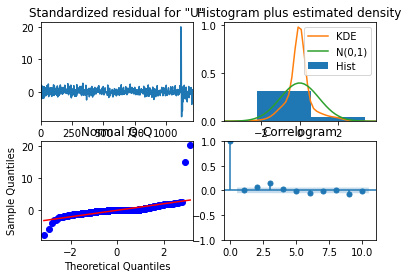

In [116]:
#Model diagnostics
arima.plot_diagnostics()
plt.show()


In [ ]:
# Test with SARIMA

<AxesSubplot:xlabel='Date'>

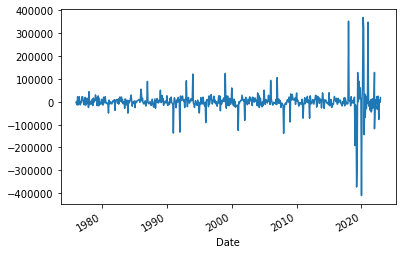

In [79]:
# identify the seasonality
#unemployment['Unemployed']-unemployment['Unemployed'].rolling(12).mean().plot()
unemp_diffs = unemployment['Unemployed'].diff().diff(12).dropna()
unemp_diffs.plot()


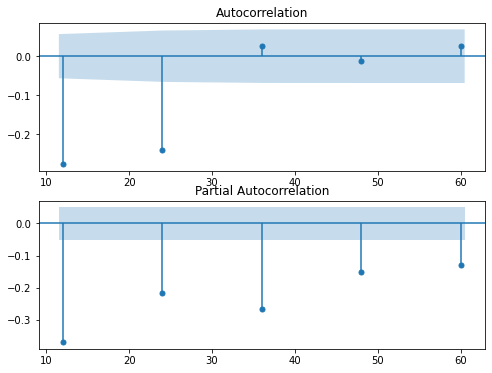

In [82]:
#use acf, pacf to check for seasonality

lags=[12, 24, 36, 48, 60]

fig, (ax1, ax2) = plt.subplots(2,1 , figsize=(8,6))
plot_acf(unemp_diffs, lags=lags, zero=False, ax=ax1)
plot_pacf(unemp_diffs, lags=lags, zero=False, ax=ax2)
plt.show()

In [83]:
#let's try sarimax with the order of (1,1,1)12

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [89]:
sarima_model=SARIMAX(train_data.sort_index(ascending=True), order=(2,1,1), seasonal_order=(1,1,1,12))
sarima_results=sarima_model.fit()

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11930D+01    |proj g|=  4.84863D-02

At iterate    5    f=  1.11694D+01    |proj g|=  3.83170D-03

At iterate   10    f=  1.11693D+01    |proj g|=  9.16278D-04

At iterate   15    f=  1.11689D+01    |proj g|=  3.98477D-02

At iterate   20    f=  1.11634D+01    |proj g|=  4.90304D-03

At iterate   25    f=  1.11633D+01    |proj g|=  1.19150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


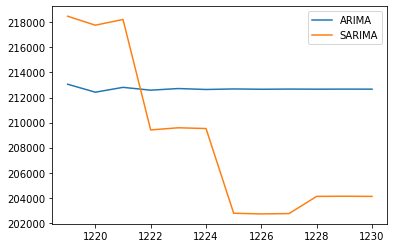

In [109]:
sarima_pred=sarima_results.get_forecast(steps=12)
sarima_mean=sarima_pred.predicted_mean
plt.plot(arima_mean.index, arima_mean, label='ARIMA')
#plt.plot(unemployment.index, unemployment['Unemployment'], label='observed')
plt.plot(sarima_mean.index, sarima_mean, label='SARIMA')
plt.plot
plt.legend()
plt.show()

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


[]

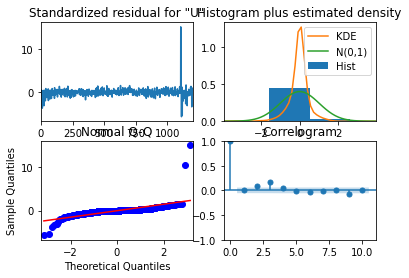

In [114]:
sarima_results.plot_diagnostics()
plt.plot()

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
seasonal_decompose

In [41]:
decomp=seasonal_decompose(unemployment['Unemployed'].sort_index(ascending=True), period = 12)

In [42]:
d_trend = decomp.trend
d_seasonal = decomp.seasonal
d_residual = decomp.resid

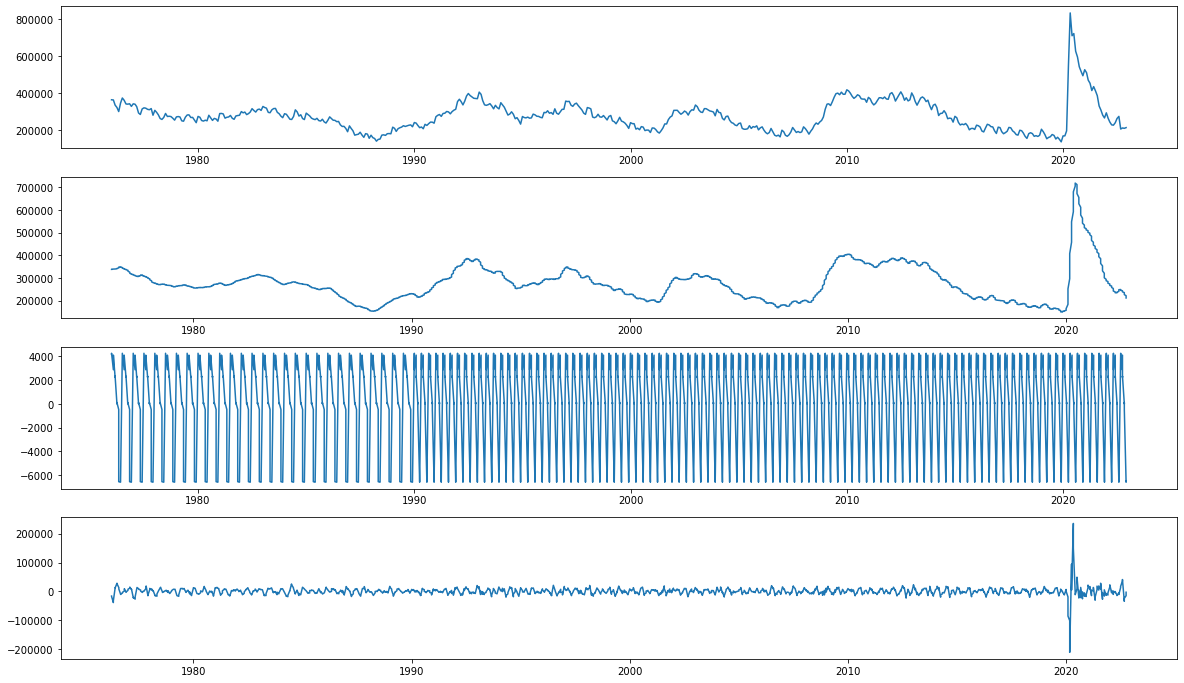

In [43]:
fig,ax = plt.subplots(4,1,figsize=(20,12))
plt.subplot(411)
plt.plot(unemployment['Unemployed'].sort_index(ascending=True), label='Actual Data')
plt.subplot(412)
plt.plot(d_trend, label="Trend")
plt.subplot(413)
plt.plot(d_seasonal, label ="Seasonal")
plt.subplot(414)
plt.plot(d_residual, label="Residual")

In [54]:
models=[]
for i in my_list:   
    m=ARIMA(train_data, order=i).fit()
    models.append(m)

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

In [55]:
from sklearn.metrics import mean_squared_error
aic=[]
bic=[]
MSE=[]
RMSE=[]

for i in models:
    aic.append(i.aic)
    bic.append(i.bic)
    forecast=i.fittedvalues
    mse=mean_squared_error(train_data, forecast)
    rmse=mean_squared_error(train_data, forecast, squared=False)
    MSE.append(mse)
    RMSE.append(rmse)

In [56]:
pd.DataFrame({'AIC': aic, 'BIC': bic, 'MSE': MSE, 'RMSE': RMSE}, index=my_list).sort_values('MSE', ascending=False)

,AIC,BIC,MSE,RMSE
"(0, 1, 0)",30103.433219,30108.537364,3.229693e+09,56830.391436
"(1, 1, 0)",29892.121237,29902.329525,2.710554e+09,52062.985747
"(2, 1, 0)",29782.033064,29797.345497,2.471933e+09,49718.537770
"(3, 1, 0)",29735.484967,29755.901543,2.375134e+09,48735.347216
"(4, 1, 0)",29620.857557,29646.378277,2.157656e+09,46450.578887
"(5, 1, 0)",29593.656895,29624.281760,2.106361e+09,45895.113304
"(0, 1, 1)",29448.374528,29458.582816,1.822925e+09,42695.728067
"(1, 1, 1)",29437.262342,29452.574774,1.802782e+09,42459.184506
"(0, 1, 2)",29408.260813,29423.573245,1.799281e+09,42417.933841
"(2, 1, 1)",29432.402045,29452.818621,1.789805e+09,42306.084480


In [57]:
arma = ARIMA(train_data, order=(4,1,1)).fit()

/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/evgeniya/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:585: ValueWarning: A date index has been provided, 

In [58]:
arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Unemployed   No. Observations:                 1218
Model:                 ARIMA(4, 1, 1)   Log Likelihood              -14688.637
Date:                Sat, 18 Feb 2023   AIC                          29389.273
Time:                        10:08:32   BIC                          29419.898
Sample:                             0   HQIC                         29400.801
                               - 1218                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0967      0.017      5.695      0.000       0.063       0.130
ar.L2         -0.0857      0.027     -3.131      0.002      -0.139      -0.032
ar.L3         -0.0630      0.028     -2.277      0.023      -0.117      -0.009
ar.L4         -0.1261      0.035     -3.573      0.000      -0.195      -0.057
ma.L1         -0.9995      0.014    -69.992      0.000      -1.027      -0.971
sigma2      2.166e+09   6.33e-12   3.42e+20      0.000    2.17e+09    2.17e+09
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):             38302.61
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               1.02   Skew:                             2.03
Prob(H) (two-sided):                  0.84   Kurtosis:                        30.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.29e+35. Standard errors may be unstable.
"""